# LangGraph
## Quick Start
- https://langchain-ai.github.io/langgraph/tutorials/introduction/

In [1]:
!pdm add langgraph langchain-aws

Adding packages to default dependencies: langgraph, langchain-aws
⠸ 0:00:00 Resolve for environment (==3.12.*) 2 resolved, 5 to resolve
⠦ 0:00:00 Resolve for environment (==3.12.*) 2 resolved, 5 to resolve━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  
⠏ 0:00:00 Resolve for environment (==3.12.*) 2 resolved, 5 to resolve━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  
⠹ 0:00:01 Resolve for environment (==3.12.*) 4 resolved, 11 to resolveresolve━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  
⠦ 0:00:01 Resolve for environment (==3.12.*) 4 resolved, 11 to resolve━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  
⠏ 0:00:01 Resolve for environment (==3.12.*) 5 resolved, 12 to resolve resolve━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  
⠹ 0:00:01 Resolve for environment (==3.12.*) 5 resolved, 12 to resolvem━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  
⠴ 0:00:02 Resolve for environment (==3.12.*) 5 resolved, 12 to resolvem━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  
⠇ 0:00:02 Resolve for environment (==3.12.*) 5 resolved, 12 to resolvem━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  
⠹ 0:0

In [2]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [4]:
from langchain_aws import ChatBedrock

model = ChatBedrock(model_id="anthropic.claude-3-5-sonnet-20240620-v1:0")

def chatbot(state: State):
    return {"messages": [model.invoke(state["messages"])]}

# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [8]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

graph = graph_builder.compile()

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


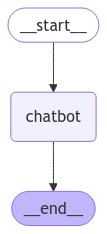

In [9]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [("user", user_input)]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User:  What is LangGraph?


Assistant: LangGraph is an open-source Python library developed by LangChain that helps developers build and manage complex AI agent workflows and applications. It's designed to work with Large Language Models (LLMs) and other AI components to create more sophisticated, multi-step AI processes.

Key features and concepts of LangGraph include:

1. Graph-based structure: It uses a graph-based approach to represent and manage the flow of information and tasks between different components of an AI system.

2. State management: LangGraph provides tools for managing the state of AI agents and workflows, allowing for more complex and stateful interactions.

3. Integration with LangChain: It's built to work seamlessly with LangChain, leveraging its components and abstractions for working with language models.

4. Flexible agent design: Developers can create custom agents with specific behaviors and roles within a larger system.

5. Workflow orchestration: It allows for the creation of complex 